<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.001213  39.786313  32.471043  ...  125.033348  123.718327  1.315021
      1.0    36.173569  39.505096  65.642118  ...  154.780758  151.800214  2.980544
      2.0    72.922526  81.218589  60.037261  ...  215.367981  223.993002 -8.625021
      3.0    77.075675  77.580317  92.918399  ...  250.428997  257.167109 -6.738111
      4.0    28.741757  58.220659  30.905493  ...  127.009050  128.740872 -1.731822
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  26.193313  64.536879  52.461618  ...  151.930828  152.413475 -0.482647
      246.0  76.063044  24.814174  28.596930  ...  145.161436  138.343135  6.818301
      247.0  28.234526  48.871646  48.189443  ...  138.197451  134.542515  3.654937
      248.0  74.272499  80.722513  93.433665  ...  263.726265  257.819021  5.907244
      249.0  37.096434  22.356278  31.881752  ...  105.884624  100.476588  5.408037

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.001213  39.786313  32.471043  ...  125.033348  123.718327  1.315021
      1.0    36.173569  39.505096  65.642118  ...  154.780758  151.800214  2.980544
      2.0    72.922526  81.218589  60.037261  ...  215.367981  223.993002 -8.625021
      3.0    77.075675  77.580317  92.918399  ...  250.428997  257.167109 -6.738111
      4.0    28.741757  58.220659  30.905493  ...  127.009050  128.740872 -1.731822
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  26.193313  64.536879  52.461618  ...  151.930828  152.413475 -0.482647
      246.0  76.063044  24.814174  28.596930  ...  145.161436  138.343135  6.818301
      247.0  28.234526  48.871646  48.189443  ...  138.197451  134.542515  3.654937
      248.0  74.272499  80.722513  93.433665  ...  263.726265  257.819021  5.907244
      249.0  37.096434  22.356278  31.881752  ...  105.884624  100.476588  5.408037

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.001213,39.786313,32.471043,1.774779,125.033348,123.718327,1.315021
1,0.0,1.0,36.173569,39.505096,65.642118,3.459976,154.780758,151.800214,2.980544
2,0.0,2.0,72.922526,81.218589,60.037261,-8.810394,215.367981,223.993002,-8.625021
3,0.0,3.0,77.075675,77.580317,92.918399,-7.145393,250.428997,257.167109,-6.738111
4,0.0,4.0,28.741757,58.220659,30.905493,-0.858858,127.009050,128.740872,-1.731822
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,26.193313,64.536879,52.461618,-1.260982,151.930828,152.413475,-0.482647
249996,999.0,246.0,76.063044,24.814174,28.596930,5.687287,145.161436,138.343135,6.818301
249997,999.0,247.0,28.234526,48.871646,48.189443,2.901836,138.197451,134.542515,3.654937
249998,999.0,248.0,74.272499,80.722513,93.433665,5.297586,263.726265,257.819021,5.907244


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.001213  39.786313  32.471043  ...  125.033348  123.718327  1.315021
      1.0    36.173569  39.505096  65.642118  ...  154.780758  151.800214  2.980544
      2.0    72.922526  81.218589  60.037261  ...  215.367981  223.993002 -8.625021
      3.0    77.075675  77.580317  92.918399  ...  250.428997  257.167109 -6.738111
      4.0    28.741757  58.220659  30.905493  ...  127.009050  128.740872 -1.731822
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  26.193313  64.536879  52.461618  ...  151.930828  152.413475 -0.482647
      246.0  76.063044  24.814174  28.596930  ...  145.161436  138.343135  6.818301
      247.0  28.234526  48.871646  48.189443  ...  138.197451  134.542515  3.654937
      248.0  74.272499  80.722513  93.433665  ...  263.726265  257.819021  5.907244
      249.0  37.096434  22.356278  31.881752  ...  105.884624  100.476588  5.408037

[250000 rows x 7 columns]

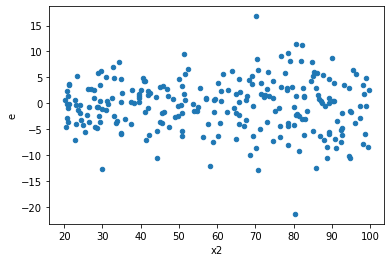

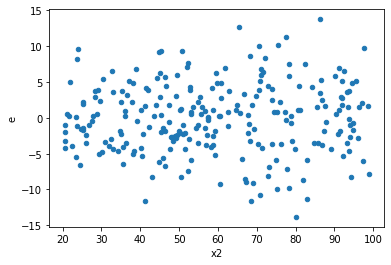

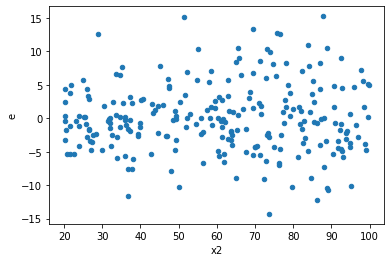

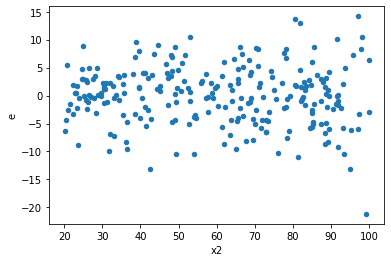

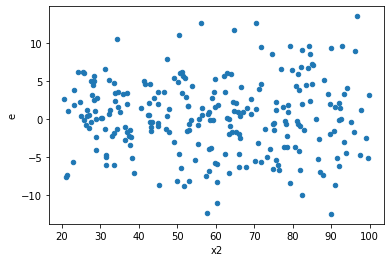

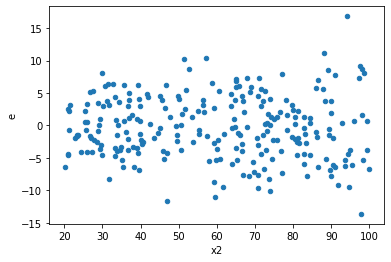

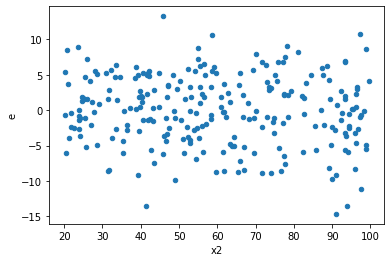

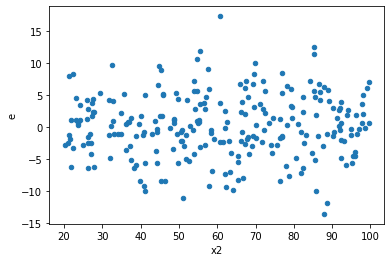

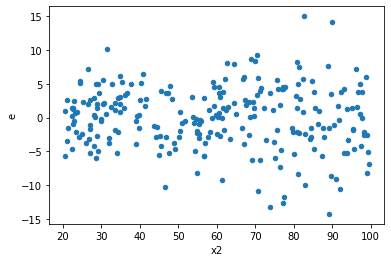

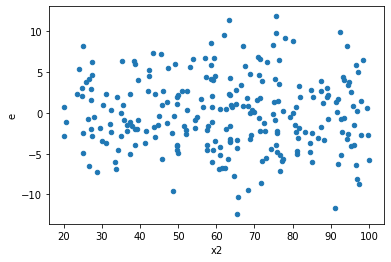

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,1672.1721676507218,3328.275338749949,17.238888326296102,34.31211689432937,1.9903903456460046,0.0008125494653605791,0.9995937252673197,0.0004062747326802896,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2105.06080085639,3638.0541068568095,21.701657740787525,37.50571244182278,1.7282418186575708,0.007566966460409441,0.9962165167697953,0.0037834832302047205,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1868.6658882130664,2879.2646436576388,19.264596785701716,29.683140656264317,1.540812973479689,0.034409459491619554,0.9827952702541902,0.017204729745809777,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1674.5051562864164,2787.2335543434656,17.262939755530066,28.734366539623355,1.6645117776315297,0.012796356881260795,0.9936018215593696,0.006398178440630398,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1698.3693223797293,3450.9302284771816,17.508962086388962,35.57660029357919,2.031908009055292,0.0005669873120661695,0.9997165063439669,0.00028349365603308474,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1664.0522092616739,3533.09585565283,17.155177415068803,36.42366861497763,2.1231881043085994,0.0002562557290606282,0.9998718721354697,0.0001281278645303141,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1564.8123622837918,3018.395676150347,16.132086209111257,31.117481197426255,1.928918603215211,0.0013811273075829966,0.9993094363462085,0.0006905636537914983,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,1966.1185919155364,3655.8527817618533,20.269263834180787,37.68920393568921,1.8594263829223314,0.0025047990968491973,0.9987476004515754,0.0012523995484245987,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1412.7346785899056,2901.3894155367248,14.564275037009336,29.911231088007472,2.0537397853308814,0.00046905481596803966,0.999765472592016,0.00023452740798401983,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1672.1721676507218,3328.275338749949,17.238888326296102,34.31211689432937,1.9903903456460046,0.0008125494653605791,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,2105.06080085639,3638.0541068568095,21.701657740787525,37.50571244182278,1.7282418186575708,0.007566966460409441,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1868.6658882130664,2879.2646436576388,19.264596785701716,29.683140656264317,1.540812973479689,0.034409459491619554,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1674.5051562864164,2787.2335543434656,17.262939755530066,28.734366539623355,1.6645117776315297,0.012796356881260795,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1698.3693223797293,3450.9302284771816,17.508962086388962,35.57660029357919,2.031908009055292,0.0005669873120661695,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1664.0522092616739,3533.09585565283,17.155177415068803,36.42366861497763,2.1231881043085994,0.0002562557290606282,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1564.8123622837918,3018.395676150347,16.132086209111257,31.117481197426255,1.928918603215211,0.0013811273075829966,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,1966.1185919155364,3655.8527817618533,20.269263834180787,37.68920393568921,1.8594263829223314,0.0025047990968491973,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1412.7346785899056,2901.3894155367248,14.564275037009336,29.911231088007472,2.0537397853308814,0.00046905481596803966,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    890
Reject005=1 : Homoscedasticity      110
Name: Result_test, dtype: int64